<a href="https://colab.research.google.com/github/namwootree/Basic_Skill/blob/main/Web_Crawling/%EC%9B%B9%ED%81%AC%EB%A1%A4%EB%A7%81_%EC%8B%AC%ED%99%94_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 동적 페이지 크롤링하기(3)
기존 배운 것들의 조합

해당 웹툰의 해당 화 페이지로 requests.get 했더니,  
안가져와지네?? -> iframe  
iframe_url로 requests.get했더니, 
안가져와지네?? -> javascript  
network tab에서 preview 보면서 requests_url을 찾아낸다.

### 하나의 웹툰, 하나의 화 전체 댓글 가져오기

In [ ]:
import json

import requests
from bs4 import BeautifulSoup

from tqdm.notebook import tqdm

# 댓글 딕셔너리
webtoon = {
        'index' : [],
        '댓글' : [],
        '공감수' : [],
        '비공감수' :[]
        }

In [ ]:
# 전체 댓글의 맨 뒤페이지 번호 가져오기
url = 'https://apis.naver.com/commentBox/cbox/web_naver_list_jsonp.json?'

params ={
        'ticket' : 'comic',  
        'templateId' : 'webtoon',  
        'pool' : 'cbox3',  
        '_callback' : '', # jQuery112409091552467251651_1615854232166 -> ''  
        'lang' : 'ko',  
        'country' : 'KR',  
        'objectId' : '650305_298', # 웹툰의 고유 아이디_해당화 인덱스  
        'pageSize' : 15,  
        'indexSize' : 10,  
        'listType' : 'OBJECT',  
        'pageType' : 'default',  
        'page' : 1, # 전체댓글의 페이지 번호 
        'refresh' : 'true',  
        'sort' : 'NEW' # 전체댓글 URL의 고유 쿼리 
        }

headers = {
    'referer': 'https://comic.naver.com/comment/comment.nhn?titleId=650305&no=298',
    'user-agent': 'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/88.0.4324.146 Safari/537.36'
}

resp = requests.get(url, params=params, headers=headers)

In [ ]:
print(resp.text) 

# _callback({ ~~~~~ }); -> { ~~~~~ }만 뽑아내야한다. ( '_callback(' & ');' 제거 )
dic_resp = json.loads(resp.text[10:-2]) # resp.text[10:-2] -> { ~~~~~ } 
print(dic_resp)

_callback({"success":true,"code":"1000","message":"요청을 성공적으로 처리하였습니다.","lang":"ko","country":"KR","result":{"commentList":[{"ticket":"comic","objectId":"650305_298","categoryId":"*","templateId":"webtoon","commentNo":"436138918","parentCommentNo":"436138918","replyLevel":1,"replyCount":0,"replyAllCount":0,"replyPreviewNo":null,"replyList":null,"imageCount":0,"imageList":null,"imagePathList":null,"imageWidthList":null,"imageHeightList":null,"commentType":"txt","stickerId":null,"sticker":null,"sortValue":1648691293541,"contents":"여러분은 지금 웹크롤링을 하고 있습니다","userIdNo":"5CnLs","exposedUserIp":null,"lang":"ko","country":"KR","idType":"naver","idProvider":"naver","userName":"N드라이브용","userProfileImage":"https://profile-phinf.pstatic.net/07468/411d870ea1498b714d380f99f1eab8daafd3c590d8d6a71463674b74b7565bee.jpg","profileType":"naver","modTime":"2022-03-31T10:48:14+0900","modTimeGmt":"2022-03-31T01:48:14+0000","regTime":"2022-03-31T10:48:14+0900","regTimeGmt":"2022-03-31T01:48:14+0000","sympathyCou

In [ ]:
totalPages = dic_resp['result']['pageModel']['totalPages']
totalPages

175

In [ ]:
# best 댓글

# 전체 댓글
url = 'https://apis.naver.com/commentBox/cbox/web_naver_list_jsonp.json?'

for page in range(1, totalPages+1):
    params ={
            'ticket' : 'comic',  
            'templateId' : 'webtoon',  
            'pool' : 'cbox3',  
            '_callback' : '',  
            'lang' : 'ko',  
            'country' : 'KR',  
            'objectId' : '650305_298', # 웹툰의 고유 아이디_해당화 인덱스  
            'pageSize' : 15,  
            'indexSize' : 10,  
            'listType' : 'OBJECT',  
            'pageType' : 'default',  
            'page' : page, # 전체댓글의 페이지 번호 
            'refresh' : 'true',  
            'sort' : 'NEW', # 전체댓글 URL의 고유 쿼리 
            '_' : 1612753212403
            }

    headers = {
        'referer': 'https://comic.naver.com/comment/comment.nhn?titleId=650305&no=298',
        'user-agent': 'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/88.0.4324.146 Safari/537.36'
    }

    resp = requests.get(url, params=params, headers=headers)

    dic_resp = json.loads(resp.text[10:-2])
    dic_resp
    # result commentList : [] 'antipathyCount', 'contents', 'commentNo', 'sympathyCount'

    # webtoon = {
    #         'index' : [],
    #         '댓글' : [],
    #         '공감수' : [],
    #         '비공감수' :[]
    #         }

    commentList = dic_resp['result']['commentList']

    for comment in commentList:
        webtoon['index'].append(comment['commentNo'])
        webtoon['댓글'].append(comment['contents'])
        webtoon['공감수'].append(comment['sympathyCount'])
        webtoon['비공감수'].append(comment['antipathyCount'])


### 내가 좋아하는 웹툰 댓글 가져오기

In [ ]:
# 웹툰 : 이두나 -> 최신화의 베스트 댓글 가져오기
from tqdm.notebook import tqdm

import requests
from bs4 import BeautifulSoup

import json

webtoon = {
          'index' : [],
          '댓글' : [],
          '공감수' : [],
          '비공감수' :[]
           }

url = 'https://apis.naver.com/commentBox/cbox/web_naver_list_jsonp.json?'

params = {
          'ticket':'comic',
          'templateId':'webtoon',
          'pool':'cbox3',
          '_cv':20220324144853,
          '_callback':'',
          'lang':'ko',
          'country':'KR',
          'objectId':'731130_140',
          'pageSize':15,
          'indexSize':10,
          'listType':'OBJECT',
          'pageType':'default',
          'page':1,
          'initialize':'true',
          'useAltSort':'true',
          'replyPageSize':10,
          '_':1648688567981
          }


headers = {
          'referer': 'https://comic.naver.com/comment/comment?titleId=731130&no=140',
          'user-agent': 'Mozilla/5.0 (Macintosh; Intel Mac OS X 10_15_7) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/99.0.4844.84 Safari/537.36'
          }

resp = requests.get(url, params=params, headers=headers)

In [ ]:
dic_resp = json.loads(resp.text[10:-2])
commentList = dic_resp['result']['commentList']

for comment in commentList:
  webtoon['index'].append(comment['commentNo'])
  webtoon['댓글'].append(comment['contents'])
  webtoon['공감수'].append(comment['sympathyCount'])
  webtoon['비공감수'].append(comment['antipathyCount'])

In [ ]:
print(len(webtoon['index']))
print(len(webtoon['댓글']))
print(len(webtoon['공감수']))
print(len(webtoon['비공감수']))

15
15
15
15


In [ ]:
import pandas as pd
df_webtoon = pd.DataFrame(webtoon)
df_webtoon

,index,댓글,공감수,비공감수
0,434997018,대체 최이라랑 엮은 이유가 뭘까? 웹툰 내내 밀어내고 절대 안 될 거 같은 서사를 ...,8062,708
1,434993980,별점 역대급으로 곱창날거같으면 개추 ㅋㅋ,5856,673
2,434993107,그냥 밑도끝도없이 미련남게 끝낸다고 이게 아련한게 아닌데 나노리스트에서 성공했다고 ...,4345,716
3,434996151,위층에 살았던 그녀는 &lt; 두나가 1층 원준이 2층 살았는데 뭐지 작가님 정신 ...,3948,234
4,435021400,난 작가의 말 괜찮은데? 애당초 문열라는 택배드립도 장난으로 치는 마당에 저정도는 ...,3944,319
5,435381383,왜지... 난 너무 좋은 결말인데...,3927,490
6,434998198,이라랑만 안 엮었어도 이 정도 분위기는 아니었을텐데...왜 굳이 누군가랑 엮는 엔딩...,3284,242
7,435038389,이 이야기의 결말에 많은 사람들이 분노하고 탄식하는 것은 그만큼 이 웹툰에 애정을 ...,3210,176
8,434997325,"사실 작가의 말 안 썼으면 그냥 대충 7점 주고 ""지금까지 재밌었다.""했을텐데 작가...",2805,706
9,434998398,아니 진짜 이해가 안가네 ㅋㅋㅋㅋ 일반인이랑 연애한다고 연예인 못함? 저 연차면 자...,2562,610


In [ ]:
# 좋아하는 웹툰 (이두나)의 모든 회차 -> 베스트 댓글 가져오기
from tqdm.notebook import tqdm

import requests
from bs4 import BeautifulSoup

import json

webtoon = {
          '웹툰 회차' : [],
          '댓글 번호' : [],
          '댓글' : [],
          '공감수' : [],
          '비공감수' :[]
           }

latest_url = 'https://apis.naver.com/commentBox/cbox/web_naver_list_jsonp.json?ticket=comic&templateId=webtoon&pool=cbox3&_cv=20220324144853&_callback=jQuery112406676947952862133_1648699713760&lang=ko&country=KR&objectId=731130_140&categoryId=&pageSize=15&indexSize=10&groupId=&listType=OBJECT&pageType=default&page=1&initialize=true&userType=&useAltSort=true&replyPageSize=10&_=1648699713761'
latest_url_num = int(latest_url.split('objectId=')[1][7:10])
latest_url_num

for episode in tqdm(range(1, latest_url_num + 1)):
    url = 'https://apis.naver.com/commentBox/cbox/web_naver_list_jsonp.json?'

    params = {
              'ticket':'comic',
              'templateId':'webtoon',
              'pool':'cbox3',
              '_cv':20220324144853,
              '_callback':'',
              'lang':'ko',
              'country':'KR',
              'objectId':'731130_'+str(episode),
              'pageSize':15,
              'indexSize':10,
              'listType':'OBJECT',
              'pageType':'default',
              'page':1,
              'initialize':'true',
              'useAltSort':'true',
              'replyPageSize':10,
              '_':1648688567981
              }


    headers = {
              'referer': 'https://comic.naver.com/comment/comment?titleId=731130&no=140',
              'user-agent': 'Mozilla/5.0 (Macintosh; Intel Mac OS X 10_15_7) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/99.0.4844.84 Safari/537.36'
              }

    resp = requests.get(url, params=params, headers=headers)
    
    dic_resp = json.loads(resp.text[10:-2])
    commentList = dic_resp['result']['commentList']

    for comment in commentList:
      webtoon['웹툰 회차'].append(episode)
      webtoon['댓글 번호'].append(comment['commentNo'])
      webtoon['댓글'].append(comment['contents'])
      webtoon['공감수'].append(comment['sympathyCount'])
      webtoon['비공감수'].append(comment['antipathyCount'])



  0%|          | 0/140 [00:00<?, ?it/s]

In [ ]:
import pandas as pd
df_webtoon = pd.DataFrame(webtoon)
df_webtoon

,웹툰 회차,댓글 번호,댓글,공감수,비공감수
0,1,373745300,와 근데 막컷 담배빵은...,54495,458
1,1,373747800,막컷에 담배빵은 좀....암만 상처가 있대도 말한번 해본 사이인데..,45277,558
2,1,373745880,ㅁㅊ 나노리스트작가님이다 올리자!!,33107,249
3,1,373744565,헐 &lt;나노리스트&gt; 그 민송아??? 콧수염 그 민송아???? 올라가라 작가...,25694,265
4,1,373749482,두....두근두근 누나리스트면... 19금 달고 오셔야 하는 거 아닌가요....ㅠㅠㅠㅠ,21522,711
...,...,...,...,...,...
2088,140,435384594,지극히 현실적인 선택을 한 주인공들 같은데... 다들 화가 나셨네요.\n너무 안타깝...,2194,199
2089,140,434997017,웹툰 이름이 이두나인 이유가 모르겠습니다 저만 모르는 거겠죠?,2183,304
2090,140,435035209,이두나를 정리하자면\n\n고양이!라는 웹툰이 있음\n고양이는 귀엽다\n고양이는 어쩌...,1909,274
2091,140,434998146,두나 1층에 살았는데 머가 위층에 살았던 그녀임;;ㅋㅋㅋㅋㅋㅋㅋ,1431,129


### 코드 상에서 원하는 웹툰을 입력하면, 원하는 웹툰의 전체화 베스트 댓글 가져오기

In [ ]:
from tqdm.notebook import tqdm

import requests
from bs4 import BeautifulSoup

import json

# workflow : 
# 1. 입력한 웹툰 제목
# 2. 입력값이 제목 및 아이디 딕셔너리를 통과
# 3. 아이디 반환 
# 4. 해당 아이디로 해당 웹툰 사이트로 들어가기
# 5. 웹툰 사이트에서 최신화 정보 추출
# 6. 최신화 정보를 반복문으로 활용하여 모든 화 베스트 댓글 크롤링

# 최종 웹툰 정보를 담을 딕셔너리
webtoon = {
          '웹툰 회차' : [],
          '댓글 번호' : [],
          '댓글' : [],
          '공감수' : [],
          '비공감수' :[]
           }

# 웹툰 제목 리스트
title_name_list = [] # 웹툰 제목 리스트
title_id_list = []   # 웹툰 아이디 리스트

# 웹툰 제목(key) : ID(value) 딕셔너리
webtoon_title_id_dic = {} 

# 웹툰 제목과 아이디 찾을 URL
url_find_title_id = 'https://comic.naver.com/webtoon/weekday' 

resp_find_title_id = requests.get(url_find_title_id)

soup__find_title_id = BeautifulSoup(resp_find_title_id.content, 'lxml')

title_name_id_tag = soup__find_title_id.select('a.title')

# 웹툰 제목과 이이디를 각각의 리스트에 저장
for title_name_id in title_name_id_tag:
  title_name_list.append(title_name_id['title'])
  title_id_list.append(title_name_id['href'].split('=')[1][:6])

# 웹툰 제목 및 아이디 딕셔너리 완성
for title_name, title_id in zip(title_name_list, title_id_list) :
  webtoon_title_id_dic[title_name] = title_id

# 원하는 웹툰 제목 입력
title_name = str(input('원하는 웹툰의 제목을 입력해주세요:'))
title_id = webtoon_title_id_dic.get(title_name) # 해당 아이디 반환

# 원하는 웹툰 사이트 접속
url_latest = 'https://comic.naver.com/webtoon/list?titleId=' + title_id
resp_latest = requests.get(url_latest)
soup_latest = BeautifulSoup(resp_latest.content, 'lxml')

title_latest_tag = soup_latest.select('td.title a')

# 해당 웹툰의 최신화 추출
episode = []
for title_latest in title_latest_tag:
     episode.append(title_latest['href'].split('=')[2][:-8])

latest = int(episode[0]) # 최신화 정보

# 반복문을 통한 해당 웹툰의 전체화 배스트 댓글 크로링
for episode in tqdm(range(1, latest + 1)):
    
    # 자바스크립트로 작성되어 있음
    url = 'https://apis.naver.com/commentBox/cbox/web_naver_list_jsonp.json?'

    params = {
              'ticket':'comic',
              'templateId':'webtoon',
              'pool':'cbox3',
              '_cv':20220324144853,
              '_callback':'',
              'lang':'ko',
              'country':'KR',
              'objectId': title_id+'_'+str(episode),
              'pageSize':15,
              'indexSize':10,
              'listType':'OBJECT',
              'pageType':'default',
              'page':1,
              'initialize':'true',
              'useAltSort':'true',
              'replyPageSize':10,
              '_':1648688567981
              }


    headers = {
              'referer': 'https://comic.naver.com/comment/comment?titleId=731130&no=140',
              'user-agent': 'Mozilla/5.0 (Macintosh; Intel Mac OS X 10_15_7) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/99.0.4844.84 Safari/537.36'
              }

    resp = requests.get(url, params=params, headers=headers)
    # JSON을 딕셔너리로 변환
    dic_resp = json.loads(resp.text[10:-2])
    commentList = dic_resp['result']['commentList']

    # 최종 딕셔너리에 원하는 정보 저장
    for comment in commentList:
      webtoon['웹툰 회차'].append(episode)
      webtoon['댓글 번호'].append(comment['commentNo'])
      webtoon['댓글'].append(comment['contents'])
      webtoon['공감수'].append(comment['sympathyCount'])
      webtoon['비공감수'].append(comment['antipathyCount'])

# 딕셔너리를 데이터 프레임으로 변환
import pandas as pd

df_reviews = pd.DataFrame(webtoon)
df_reviews # 결과물

원하는 웹툰의 제목을 입력해주세요:참교육


  0%|          | 0/73 [00:00<?, ?it/s]

,웹툰 회차,댓글 번호,댓글,공감수,비공감수
0,1,402239037,솔직히 쳐맞을 애들 많지,66806,181
1,1,402239359,학폭 가해자들은 처 맞아도 할 말 없지,42843,181
2,1,402238916,"부활남 하우스키퍼 글작가님과 신석기녀 그림작가님 듀오..진짜 ""참교육"" 하러 오셨네",34178,150
3,1,402242227,근데 이게 대한민국의 현실임...,25534,246
4,1,402241467,저 장발아저씨 한테서 부활남 석환이 냄새가난다..\n빠꾸없는 사이다 캐릭,21777,135
...,...,...,...,...,...
1088,73,434033173,신안 염전노예 그래서 그 주인들 처벌받음? ㅋㅋ 할매 할아배라고 또 또 봐줬겠지 ㅋ...,3460,29
1089,73,434033102,신안군이 정신나간 범죄가 발생할수밖에없는이유는\n간단함 해당지역 공권력역시 해당지역...,3060,62
1090,73,435976331,???:아따.. 작가님 나와보시랑께요??? 나 저 앞 염전주인디... 다 같이 먹고...,2380,49
1091,73,435991235,지역비하가 아니라 사실적시 팩트폭행이다 이건. ㅇㅈ?,2330,35


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 44277 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 44048 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 49688 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 44277 missing from current font.
  font.set_text(s, 0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 44048 missing from current font.
  font.set_text(s, 0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 49688 missing from current font.
  font.set_text

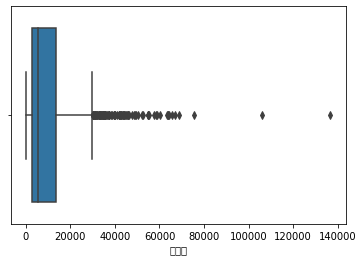

In [ ]:
import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns

sns.boxplot(df_reviews['공감수'])

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 44277 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 44048 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 49688 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 44277 missing from current font.
  font.set_text(s, 0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 44048 missing from current font.
  font.set_text(s, 0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 49688 missing from current font.
  font.set_text

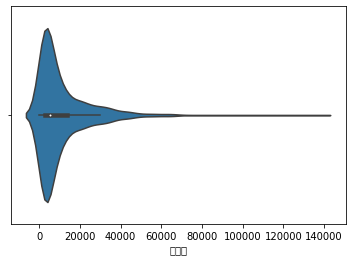

In [ ]:
sns.violinplot(df_reviews['공감수'])

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 44277 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 44048 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 49688 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 44277 missing from current font.
  font.set_text(s, 0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 44048 missing from current font.
  font.set_text(s, 0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 49688 missing from current font.
  font.set_text

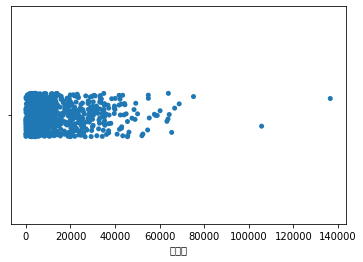

In [ ]:
sns.stripplot(df_reviews['공감수'])

### 입력한 웹툰의 전체 화 전체 댓글 가져오기



In [ ]:
from tqdm.notebook import tqdm

import requests
from bs4 import BeautifulSoup

import pandas as pd

In [ ]:
# 원하는 웹툰 제목 입력
MyWebtoon = input('어떤 웹툰의 댓글을 가져올까요?')
print('네 {}의 댓글을 수집하겠습니다.'.format(MyWebtoon))

# 요일 전체 웹툰
url = 'https://comic.naver.com/webtoon/weekday'
resp = requests.get(url)

soup = BeautifulSoup(resp.content, 'lxml')

# 1. 해당 웹툰 아이디 추출

# 해당 웹툰 사이트 접속
MyURL = 'https://comic.naver.com' + soup.select("a[title={}]".format(MyWebtoon))[0]['href']
# 해당 웹툰의 아이디
title_id = MyURL.split('&')[0].split('=')[1]

# 2. 해당 웹툰 최신화 회차 추출
resp = requests.get(MyURL)
soup = BeautifulSoup(resp.content, 'lxml')
currentNo = soup.select('td.title a')[0]['href'].split('no=')[1].split('&')[0]

# 3. 회차 별 웹툰 사이트 접속
import json
from tqdm.notebook import tqdm

for no in tqdm(range(1, int(currentNo)+1), desc=MyWebtoon):
    # 끝페이지 가져오기
    # 웹툰 아이디와 회차 변경
    url = 'https://apis.naver.com/commentBox/cbox/web_naver_list_jsonp.json?ticket=comic&templateId=webtoon&pool=cbox3&_callback=jQuery112408459589214855283_1612831780064&lang=ko&country=KR&objectId={titleId}_{no}&categoryId=&pageSize=15&indexSize=10&groupId=&listType=OBJECT&pageType=default&page=1&refresh=true&sort=new&_=1612831780066'.format(titleId=title_id, no=no)

    headers = {
        'referer': 'https://comic.naver.com/comment/comment.nhn?titleId=758037&no=15',
        'user-agent': 'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/88.0.4324.146 Safari/537.36'
    }
    resp = requests.get(url, headers=headers)

    dic_resp = json.loads(resp.text[42:-2])

    last_pg = dic_resp['result']['pageModel']['totalPages']

    # 전체댓글 가져오기
    for pg in tqdm(range(1, int(last_pg)+1), desc=str(no)+'화'):
        url = 'https://apis.naver.com/commentBox/cbox/web_naver_list_jsonp.json?ticket=comic&templateId=webtoon&pool=cbox3&_callback=jQuery112408459589214855283_1612831780064&lang=ko&country=KR&objectId={titleId}_{no}&categoryId=&pageSize=15&indexSize=10&groupId=&listType=OBJECT&pageType=default&page=1&refresh=true&sort=new&_=1612831780066'.format(titleId=title_id, no=no)

        headers = {
            'referer': 'https://comic.naver.com/comment/comment.nhn?titleId=758037&no=15',
            'user-agent': 'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/88.0.4324.146 Safari/537.36'
        }
        resp = requests.get(url, headers=headers)

        dic_resp = json.loads(resp.text[42:-2])

        for comment in dic_resp['result']['commentList']:
            # print(comment['contents'])
            pass

어떤 웹툰의 댓글을 가져올까요?신의 탑
네 신의 탑의 댓글을 수집하겠습니다.


ValueError: ignored

### selenium

장점:
*   내가 원하는 부분을 클릭할 수 있게 함
*   브라우저로 들어갈 수 있는 페이지를 컨트롤 가능

단점:
*   네트워크의 영향을 많이 받음
*   페이지를 넘기는 동작 속도가 느려짐


